In [350]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


### Country Listing from CDC

In [351]:
import requests
from bs4 import BeautifulSoup

def getAffectedCountries():
    """
    Grab the Data from the cdc page. 
    I noticed that the CDC Listed countries  differs from the Who report.
    At this time Russia, Sweden & UK are not in the WHO report !!
    
    """
    GlobalCasesUrl = "https://www.cdc.gov/coronavirus/2019-ncov/locations-confirmed-cases.html#map"
    try:
        r = requests.get(GlobalCasesUrl)
    except requests.exceptions.RequestException as e:  
        print("something went wrong fetching the page\n{}".format(GlobalCasesUrl))
        print(e)
        sys.exit(1)
    soup = BeautifulSoup(r.content, 'html.parser')
    u = soup.find_all(attrs={"class" : "list-unstyled cc-md-2"})
    countries = list()
    for li in u[0].find_all('li'):
        countries.append(li.text)
    return countries

In [352]:
country = getAffectedCountries()
print("{} affected countries".format(len(country)))
for i in country:
    print(i)

28 affected countries
China
Hong Kong
Macau
Taiwan
Australia
Cambodia
Canada
Finland
France
Germany
India
Italy
Japan
Spain
Malaysia
Nepal
Philippines
Russia
Sri Lanka
Singapore
Spain
Sweden
Thailand
The Republic of Korea
United Arab Emirates
United Kingdom
United States
Vietnam


## Data Captured from the WHO Situation Reports
### Note this does not necessarily correlate with other sources of data 


In [353]:
xlf = "who-confirmed-cases.xlsx"

In [354]:
df = pd.read_excel(xlf,'WHO-Data')
sn = pd.read_excel(xlf,'SituationNumbers')
wf = df[~df['Country'].str.contains('China -',regex=False)]

In [355]:
### Some steps to sanitize the data, clean up typo's
### Filter out the Province data
country = df.Country[~df['Country'].str.contains('China -',regex=False)].unique()
print("No of Countries should match the summary + China\nNo Countries {}\nCountries :\n{}".format(len(country),np.sort(country)))

No of Countries should match the summary + China
No Countries 24
Countries :
['Australia' 'Cambodia' 'Canada' 'China' 'Finland' 'France' 'Germany'
 'India' 'Italy' 'Japan' 'Malaysia' 'Nepal' 'Philippines'
 'Republic of Korea' 'Russia' 'Singapore' 'Spain' 'Sri Lanka' 'Sweden'
 'Thailand' 'United Arab Emirates' 'United Kingdom'
 'United States of America' 'Viet Nam']


In [356]:
def plot_China_Infected():

    ### Plot the China Data
    x = wf.Date[wf.Country == 'China']
    y = wf.WHO_Confirmed[wf.Country == 'China']
    plt.bar(x, y, align='center')
    plt.title('Novel Corona Virus Timeline: China')
    plt.ylabel('Infected')
    plt.xlabel('Date')
    plt.xticks(rotation='vertical')
    plt.show()

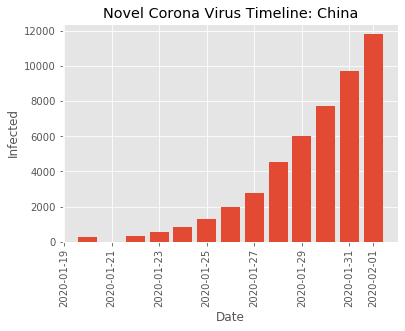

In [357]:
plot_China_Infected()

In [358]:
q = sn[sn.Area == 'China']
x1 = q.Date[q.Situation == 'Confirmed']
y1 = q.Value[q.Situation == 'Confirmed']
y2 = q.Value[q.Situation == 'Severe']

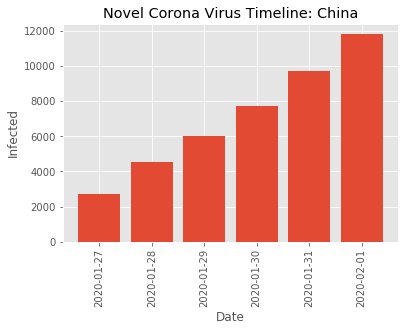

In [359]:
plt.bar(x1, y1, align ='center')
plt.title('Novel Corona Virus Timeline: China')
plt.ylabel('Infected')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.show()

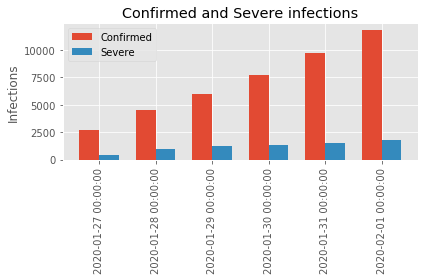

In [360]:
q = sn[sn.Area == 'China']

x1 = q.Date[q.Situation == 'Confirmed']
y1 = q.Value[q.Situation == 'Confirmed']
y2 = q.Value[q.Situation == 'Severe']
x = np.arange(len(x1))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='Confirmed')
rects2 = ax.bar(x + width/2, y2, width, label='Severe')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Infections')
ax.set_title('Confirmed and Severe infections')
ax.set_xticks(x)
ax.set_xticklabels(x1,rotation='vertical')
ax.legend()
fig.tight_layout()
plt.show()

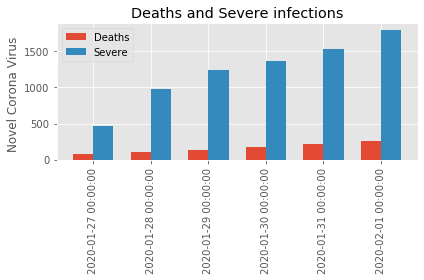

In [361]:
q = sn[sn.Area == 'China']

x1 = q.Date[q.Situation == 'Confirmed']
y1 = q.Value[q.Situation == 'Deaths']
y2 = q.Value[q.Situation == 'Severe']
x = np.arange(len(x1))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='Deaths')
rects2 = ax.bar(x + width/2, y2, width, label='Severe')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Novel Corona Virus ')
ax.set_title('Deaths and Severe infections')
ax.set_xticks(x)
ax.set_xticklabels(x1,rotation='vertical')
ax.legend()
fig.tight_layout()
plt.show()

## WikiLeaks Time Line data 
### Seems to have more data - lot of Chinese language references
### https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_Wuhan_coronavirus_outbreak

In [362]:
TimeLineUrl = "https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_Wuhan_coronavirus_outbreak"

In [363]:
# Scrape a few tables of data from this page
# 
wtd = pd.read_html(TimeLineUrl)

MainLandChina = wtd[2]
ByProvinceConfirmed = wtd[3]
ByProvinceDeaths = wtd[4]
ByProvinceRecovered = wtd[5]

In [364]:
MainLandChina.drop(len(MainLandChina)-1,inplace=True)
MainLandChina.fillna(0, inplace=True)
MainLandChina['Date(CST)'] = MainLandChina['Date(CST)'].apply(pd.to_datetime)
MainLandChina

Date(CST)              Cases                                         \
    Date(CST) Suspected(current) Confirmed(cumulative) Serious(current)   
0  2019-12-31                 27                     0                0   
1  2020-01-03                 44                     0                0   
2  2020-01-05                 59                     0                0   
3  2020-01-10                  0                    41                0   
4  2020-01-11                  0                    41                0   
5  2020-01-12                  0                    41                0   
6  2020-01-13                  0                    41                0   
7  2020-01-15                  0                     0                0   
8  2020-01-16                  0                    45                5   
9  2020-01-17                  0                    62                8   
10 2020-01-18                  0                   121                0   
11 2020-01-19                  0                   198               44   
12 2020-01-20                 54                   291                0   
13 2020-01-21                 37                   440              102   
14 2020-01-22                257                   571               95   
15 2020-01-23               1072                   830              177   
16 2020-01-24               1965                  1287              237   
17 2020-01-25               2684                  1975              324   
18 2020-01-26               5794                  2744              461   
19 2020-01-27               6973                  4515              976   
20 2020-01-28               9239                  5974             1239   
21 2020-01-29              12167                  7711             1370   
22 2020-01-30              15238                  9692             1527   
23 2020-01-31              17988                 11791             1795   
24 2020-02-01              19544                 14380             2110   

   Deaths(cumulative) Recovered(cumulative)           Quarantine  \
   Deaths(cumulative) Recovered(cumulative) Quarantined(current)   
0                   0                     0                    0   
1                   0                     0                  121   
2                   0                     0                  163   
3                   1                     0                  739   
4                   1                     0                  717   
5                   1                     0                  687   
6                   1                     0                  576   
7                   2                     7                  119   
8                   0                    12                   98   
9                   2                    15                   82   
10                  0                    19                    0   
11                  3                    25                   90   
12                  6                    25                  249   
13                  9                     0                 1394   
14                 17                     0                 4928   
15                 25                    34                 8420   
16                 41                    38                13967   
17                 56                    49                21556   
18                 80                    51                30453   
19                106                    60                44132   
20                132                   103                59990   
21                170                   124                81947   
22                213                   171               102427   
23                259                   243               118478   
24                304                   328               137594   

                                                                  Source  
   Released(on the day) Released(cumulative) Total(cumulative)    

In [365]:
I = len(ByProvinceConfirmed)
ByProvinceConfirmed.drop([I-1,I-2],inplace=True)
ByProvinceConfirmed.fillna(0, inplace=True)
ByProvinceConfirmed['Date (CST)'] = ByProvinceConfirmed['Date (CST)'].apply(pd.to_datetime)
ByProvinceConfirmed


,Date (CST),Hubei,Guangdong,Beijing,Shanghai,Zhejiang,Tianjin,Chongqing,Jiangxi,Shandong,...,Jiangsu,Jilin,Heilongjiang,Shaanxi,Xinjiang,Gansu,InnerMongolia,Qinghai,Tibet,National
0,2020-01-11,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
1,2020-01-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-16,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
6,2020-01-17,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
7,2020-01-18,59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59
8,2020-01-19,77,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,78
9,2020-01-20,72,13,5,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,92


In [366]:
ByProvinceDeaths.drop(len(ByProvinceDeaths)-1,inplace=True)
ByProvinceDeaths.fillna(0,inplace=True)
ByProvinceDeaths['Date (CST)'] = ByProvinceDeaths['Date (CST)'].apply(pd.to_datetime)
ByProvinceDeaths


,Date (CST),Hubei,Guangdong,Beijing,Shanghai,Zhejiang,Tianjin,Chongqing,Jiangxi,Shandong,...,Jiangsu,Jilin,Heilongjiang,Shaanxi,Xinjiang,Gansu,InnerMongolia,Qinghai,Tibet,National
0,2020-01-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2020-01-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,2020-01-19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,2020-01-20,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [367]:
ByProvinceRecovered.drop(len(ByProvinceRecovered)-1,inplace=True)
ByProvinceRecovered.fillna(0,inplace=True)
ByProvinceRecovered['Date (CST)'] = ByProvinceRecovered['Date (CST)'].apply(pd.to_datetime)
ByProvinceRecovered


,Date (CST),Hubei,Guangdong,Beijing,Shanghai,Zhejiang,Tianjin,Chongqing,Jiangxi,Shandong,...,Jiangsu,Jilin,Heilongjiang,Shaanxi,Xinjiang,Gansu,InnerMongolia,Qinghai,Tibet,National
0,2020-01-11,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2020-01-12,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,2020-01-13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2020-01-15,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,2020-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,2020-01-17,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
7,2020-01-18,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
8,2020-01-19,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9,2020-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [368]:
MainLandChina.to_csv('Wiki-2019-nCoV-MainlandChina.csv',index=False)
ByProvinceConfirmed.to_csv('Wiki-2019-nCoV-ByProvinceConfirmed.csv',index=False)
ByProvinceDeaths.to_csv('Wiki-2019-nCoV-ByProvinceDeaths.csv',index=False)
ByProvinceRecovered.to_csv('Wiki-2019-nCoV-ByProvinceRecovered.csv',index=False)